# Unit 5 - Financial Planning

In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [10]:
# Fetch current BTC price
btc_price=requests.get(btc_url).json()
btc_price

# Fetch current ETH price
eth_price=requests.get(eth_url).json()
eth_price

# Compute current value of my crpto
my_btc_value=my_btc*btc_price['data']['1']['quotes']['USD']['price']
my_eth_value=my_eth*eth_price['data']['1027']['quotes']['USD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $34436.40
The current value of your 5.3 ETH is $8301.50


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [11]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [12]:
# Set Alpaca API key and secret
alpaca_api_key=os.getenv('ALPACA_API_KEY')
alpaca_secret_key=os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca=tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

In [14]:
# Format current date as ISO format
today=pd.Timestamp('2023-10-19', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_tickers=alpaca.get_bars(
    tickers,
    timeframe,
    start=today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG=df_tickers[df_tickers['symbol']=='AGG'].drop('symbol', axis=1)
SPY=df_tickers[df_tickers['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_tickers=pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_tickers.head()

AGG                                              \
                           close    high    low trade_count   open    volume   
timestamp                                                                      
2023-10-19 04:00:00+00:00  91.67  92.165  91.61       39015  91.89  11501286   

                                       SPY                               \
                              vwap   close    high      low trade_count   
timestamp                                                                 
2023-10-19 04:00:00+00:00  91.8031  426.43  432.82  425.725      872881   

                                                          
                             open     volume        vwap  
timestamp                                                 
2023-10-19 04:00:00+00:00  430.95  120804565  428.964085

In [15]:
# Pick AGG and SPY close prices
agg_close_price=float(df_tickers['AGG']['close'])
spy_close_price=float(df_tickers['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $91.67
Current SPY closing price: $426.43


In [16]:
# Compute the current value of shares
my_spy_value=spy_close_price*my_spy
my_agg_value=agg_close_price*my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21321.50
The current value of your 200 AGG shares is $18334.00


### Savings Health Analysis

In [17]:
# Set monthly household income
monthly_income=12000

# Consolidate financial assets data
savings=[my_btc_value+my_eth_value, my_spy_value+my_agg_value]

# Create savings DataFrame
df_savings=pd.DataFrame(savings, columns=['amount'], index=['crypto','shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,42737.896
shares,39655.500


array([<AxesSubplot:ylabel='amount'>], dtype=object)

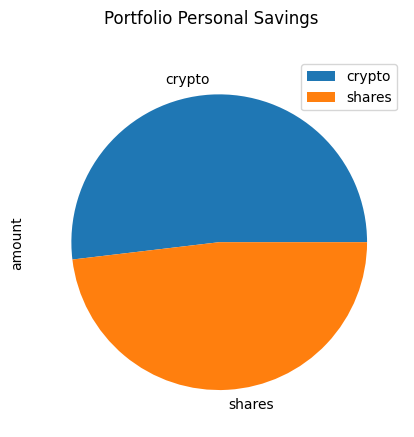

In [27]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True, title='Portfolio Personal Savings')

In [29]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings=float(df_savings.sum())

# Validate saving health
if total_savings>emergency_fund:
    print('Congratulations, You have enough money in your emergency fund.')
elif total_savings == emergency_fund:
    print('you have barley enough money in your emergency fund.')
elif total_savings < emergency_fund:
    print(f'You are ${(emergency_fund-total_savings):0.2f} away from your emergency fund goal, continue saving between 10% to 20% of your monthly income')    
    

Congratulations, You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [39]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-10-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-10-19', tz='America/New_York').isoformat()

In [40]:
# Get 5 years' worth of historical data for SPY and AGG
df_stocks=alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG=df_stocks[df_stocks['symbol']=='AGG'].drop('symbol', axis=1)
SPY=df_stocks[df_stocks['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stocks=pd.concat([AGG,SPY], axis=1, keys=['AGG','SPY'])

# Display sample data
df_stocks.head()

AGG                                       \
                            close    high      low trade_count    open   
timestamp                                                                
2018-10-19 04:00:00+00:00  104.37  104.55  104.340       13175  104.47   
2018-10-22 04:00:00+00:00  104.35  104.52  104.340       11391  104.47   
2018-10-23 04:00:00+00:00  104.48  104.74  104.475       14144  104.67   
2018-10-24 04:00:00+00:00  104.75  104.81  104.670       17520  104.69   
2018-10-25 04:00:00+00:00  104.66  104.77  104.610       15828  104.71   

                                                      SPY                  \
                             volume        vwap     close    high     low   
timestamp                                                                   
2018-10-19 04:00:00+00:00   3105921  104.390878  276.1797  279.30  275.47   
2018-10-22 04:00:00+00:00   2948119  104.408492  275.0300  277.36  274.41   
2018-10-23 04:00:00+00:00   3695313  104.605860  273.5200  274.87  268.61   
2018-10-24 04:00:00+00:00   4849462  104.742653  265.2100  273.76  264.70   
2018-10-25 04:00:00+00:00  12638378  104.664656  270.0100  271.81  266.23   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2018-10-19 04:00:00+00:00      582243  277.13  140662678  277.063759  
2018-10-22 04:00:00+00:00      449535  277.00   83420677  275.565255  
2018-10-23 04:00:00+00:00      837023  270.95  148031789  271.959702  
2018-10-24 04:00:00+00:00      938613  273.33  180061325  269.071189  
2018-10-25 04:00:00+00:00      733954  267.38  140353452  269.146254

In [41]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirty_years=MCSimulation(
    portfolio_data=df_stocks,
    weights=[.40,.60],
    num_simulation=500,
    num_trading_days=252*30
)

In [42]:
# Printing the simulation input data
mc_thirty_years.portfolio_data.head()

AGG                                       \
                            close    high      low trade_count    open   
timestamp                                                                
2018-10-19 04:00:00+00:00  104.37  104.55  104.340       13175  104.47   
2018-10-22 04:00:00+00:00  104.35  104.52  104.340       11391  104.47   
2018-10-23 04:00:00+00:00  104.48  104.74  104.475       14144  104.67   
2018-10-24 04:00:00+00:00  104.75  104.81  104.670       17520  104.69   
2018-10-25 04:00:00+00:00  104.66  104.77  104.610       15828  104.71   

                                                                   SPY  \
                             volume        vwap daily_return     close   
timestamp                                                                
2018-10-19 04:00:00+00:00   3105921  104.390878          NaN  276.1797   
2018-10-22 04:00:00+00:00   2948119  104.408492    -0.000192  275.0300   
2018-10-23 04:00:00+00:00   3695313  104.605860     0.001246  273.5200   
2018-10-24 04:00:00+00:00   4849462  104.742653     0.002584  265.2100   
2018-10-25 04:00:00+00:00  12638378  104.664656    -0.000859  270.0100   

                                                                          \
                             high     low trade_count    open     volume   
timestamp                                                                  
2018-10-19 04:00:00+00:00  279.30  275.47      582243  277.13  140662678   
2018-10-22 04:00:00+00:00  277.36  274.41      449535  277.00   83420677   
2018-10-23 04:00:00+00:00  274.87  268.61      837023  270.95  148031789   
2018-10-24 04:00:00+00:00  273.76  264.70      938613  273.33  180061325   
2018-10-25 04:00:00+00:00  271.81  266.23      733954  267.38  140353452   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-10-19 04:00:00+00:00  277.063759          NaN  
2018-10-22 04:00:00+00:00  275.565255    -0.004163  
2018-10-23 04:00:00+00:00  271.959702    -0.005490  
2018-10-24 04:00:00+00:00  269.071189    -0.030382  
2018-10-25 04:00:00+00:00  269.146254     0.018099

In [43]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirty_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/pigeoneyevideography/Desktop/module5/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.014601,1.010992,0.985673,0.993464,1.006456,0.999681,0.989633,0.998598,0.998430,0.994579,...,0.992938,0.999908,1.004436,0.992075,1.000480,1.007152,1.006620,0.999171,0.990509,0.991359
2,1.014810,0.999074,0.973179,0.991181,1.005858,1.006134,0.980130,0.987922,0.985945,0.990145,...,0.993533,0.996826,1.003562,0.975170,1.005093,0.995673,1.015218,1.012416,1.002450,0.972739
3,1.001577,0.979928,0.975811,0.995779,1.001544,1.008407,0.984821,0.976878,0.986942,0.996250,...,0.989531,0.995827,1.005355,0.978135,1.009416,0.989622,1.023468,1.013147,1.024625,0.976488
4,1.002498,0.982269,0.977693,0.998223,1.000922,1.015026,0.992673,0.967580,0.969308,1.005132,...,0.996008,1.015617,0.998011,0.969133,1.010915,0.977484,1.014337,1.032434,1.030308,0.986992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.465560,2.116176,3.222220,2.697669,4.981630,2.311994,6.953534,2.953292,5.611363,5.118471,...,2.999701,8.402154,1.277641,12.626625,9.972082,8.290002,6.106216,1.829088,13.320293,9.188457
7557,6.395562,2.108083,3.213934,2.706320,5.005608,2.290518,6.937912,2.931087,5.623217,5.157692,...,2.992540,8.425276,1.263827,12.732555,9.961080,8.307891,6.110853,1.825937,13.424366,9.353647
7558,6.398033,2.141207,3.218917,2.732870,4.989614,2.301492,6.873767,2.938356,5.656562,5.184868,...,2.992955,8.467670,1.249722,12.611280,10.088040,8.269264,6.113494,1.818607,13.477510,9.395175
7559,6.298052,2.153534,3.243688,2.734489,4.932662,2.295435,6.875313,2.916191,5.619613,5.185542,...,3.020136,8.559078,1.251251,12.501306,10.126616,8.221316,6.141594,1.819660,13.331129,9.516527


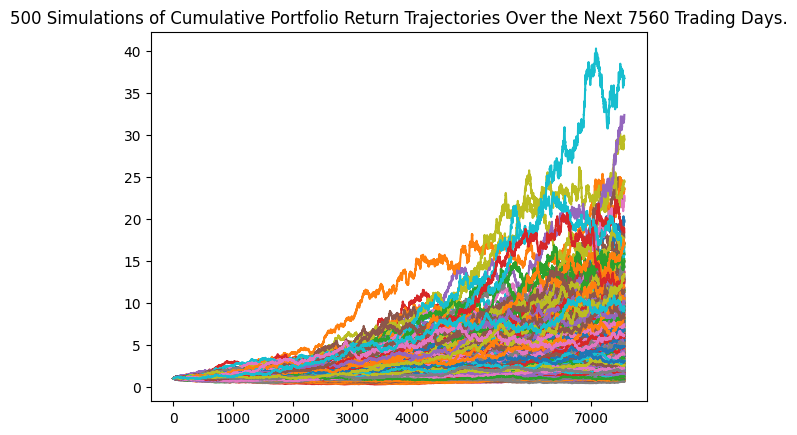

In [44]:
# Plot simulation outcomes
line_plot=mc_thirty_years.plot_simulation()

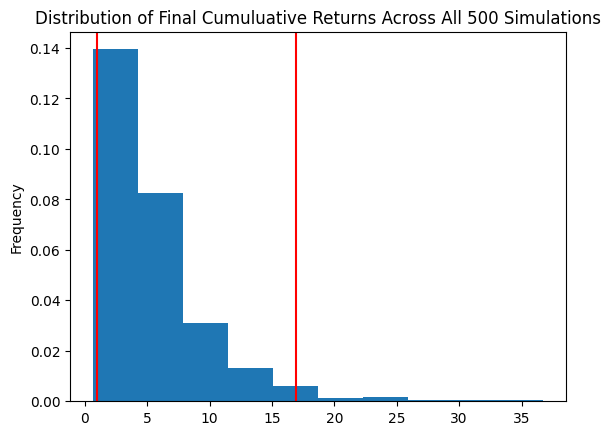

In [45]:
# Plot probability distribution and confidence intervals
dist_plot=mc_thirty_years.plot_distribution()

### Retirement Analysis

In [54]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl30=mc_thirty_years.summarize_cumulative_return()

# Print summary statistics
print(tbl30)

count           500.000000
mean              5.397462
std               4.487862
min               0.620692
25%               2.487754
50%               4.213819
75%               6.625857
max              36.759960
95% CI Lower      0.959181
95% CI Upper     16.931707
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [47]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower=round(tbl[8]*initial_investment,2)
ci_upper=round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $19183.63 and $338634.15


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [48]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower=round(tbl[8]*initial_investment,2)
ci_upper=round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $28775.44 and $507951.22


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [63]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_five_years=MCSimulation(
    portfolio_data=df_stocks,
    weights=[.20,.80],
    num_simulation=500,
    num_trading_days=252*5
)

In [64]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/pigeoneyevideography/Desktop/module5/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006262,1.024172,1.008087,0.983846,1.005875,0.996191,0.994619,0.996533,1.017724,0.996060,...,1.008626,0.984699,1.004260,1.005627,0.989680,1.006753,1.000615,1.011210,0.995488,0.977059
2,1.002331,1.020835,0.997054,0.984449,1.018518,1.003346,1.001211,1.005467,1.018189,0.992452,...,1.003528,1.000899,1.010556,0.990092,0.984980,0.986130,0.987528,1.010699,1.005286,0.979640
3,0.996261,1.018899,0.999583,1.000447,1.006841,0.988433,1.012026,1.006609,0.998974,0.974316,...,0.990017,1.016771,1.005662,0.998757,0.991585,0.976731,0.983834,1.005372,1.001923,0.978371
4,1.016500,1.008988,0.989252,0.996034,1.001248,0.980428,1.018009,1.018638,1.008112,0.967652,...,1.000280,1.033287,1.012826,1.002585,0.985788,0.956219,0.969738,1.006188,0.999914,0.989367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.855070,1.523788,1.340058,1.032049,0.764463,2.468922,1.140526,2.222744,1.441080,1.774766,...,1.512326,1.851192,1.189347,0.928804,1.354392,1.063712,1.204199,2.471817,1.288742,1.139636
1257,0.867045,1.524128,1.347315,1.028616,0.771807,2.500271,1.138897,2.237378,1.438119,1.782563,...,1.497710,1.836629,1.182108,0.941089,1.376378,1.067221,1.200355,2.455942,1.310894,1.147659
1258,0.873816,1.514021,1.326309,1.039264,0.772009,2.446471,1.132489,2.222457,1.456179,1.794573,...,1.503495,1.834908,1.174635,0.953176,1.403016,1.060970,1.183717,2.442606,1.309700,1.148878
1259,0.871332,1.507136,1.317313,1.031644,0.763682,2.451031,1.126816,2.189055,1.459217,1.794735,...,1.515711,1.854824,1.186013,0.959826,1.408087,1.067729,1.166256,2.449740,1.295040,1.169818


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

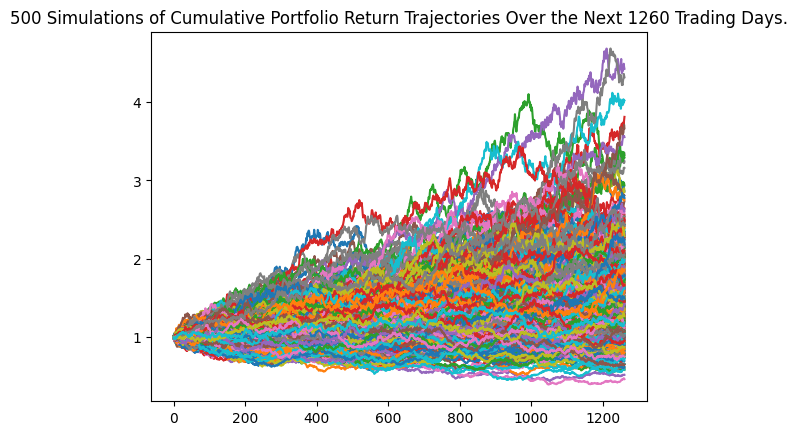

In [65]:
# Plot simulation outcomes
mc_five_years.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

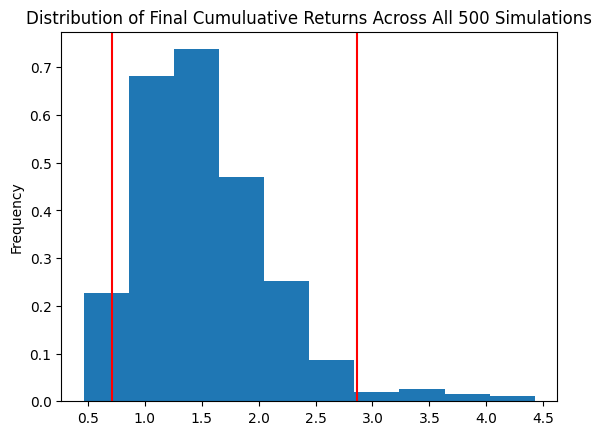

In [66]:
# Plot probability distribution and confidence intervals
mc_five_years.plot_distribution()

In [67]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl5= mc_five_years.summarize_cumulative_return()

# Print summary statistics
print(tbl5)

count           500.000000
mean              1.522801
std               0.582988
min               0.466430
25%               1.114578
50%               1.409105
75%               1.810367
max               4.423927
95% CI Lower      0.711784
95% CI Upper      2.859904
Name: 1260, dtype: float64


In [68]:
# Set initial investment
initial_investment=20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five=round(tbl[8]*initial_investment,2)
ci_upper_five=round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $19183.63 and $338634.15


### Ten Years Retirement Option

In [69]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_ten_years=MCSimulation(
    portfolio_data=df_stocks,
    weights=[.20,.80],
    num_simulation=500,
    num_trading_days=252*10
)

In [70]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/pigeoneyevideography/Desktop/module5/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005471,1.010981,1.003063,1.006806,0.995428,1.006830,1.009995,1.011292,1.003276,0.984046,...,0.995119,0.985858,1.000470,1.007352,1.014635,0.990963,1.005737,1.013282,0.987940,0.979575
2,0.993769,1.019852,0.985834,0.997789,0.985977,1.007807,1.007982,1.021681,0.992311,0.981934,...,0.979993,0.986458,0.985194,1.009029,1.003920,1.005252,1.011527,1.010464,0.974247,0.974221
3,1.001473,1.000267,0.978723,1.009221,0.984896,0.999652,1.008265,1.034146,0.970599,0.999811,...,0.984064,0.987182,0.989594,1.007394,1.030172,1.004131,1.001700,1.016717,0.974856,0.980600
4,1.004659,1.007043,0.957050,1.002023,0.947298,0.992083,1.009028,1.009745,0.988837,1.013771,...,0.973920,0.976596,0.979123,1.026408,1.025267,0.996638,0.990718,1.031386,0.975727,0.981345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.031593,0.568193,5.707383,3.457419,3.386399,1.868692,1.995100,1.000499,2.467353,7.474611,...,1.743374,0.944805,2.538872,0.992869,2.065726,1.963050,3.831692,2.146694,3.559454,3.426296
2517,2.048384,0.576067,5.654835,3.481529,3.382193,1.870944,1.977783,1.002026,2.446474,7.451171,...,1.761200,0.959253,2.556756,1.009334,2.090448,1.927548,3.774452,2.125986,3.570551,3.409411
2518,2.049830,0.575174,5.632199,3.482767,3.424773,1.897506,1.960486,1.008779,2.454164,7.497022,...,1.766469,0.962154,2.598776,1.026147,2.103144,1.937614,3.829920,2.095225,3.535748,3.440164
2519,2.055061,0.575267,5.633606,3.480823,3.393586,1.875850,1.980758,1.022105,2.468891,7.430746,...,1.771563,0.974897,2.584561,1.028875,2.126335,1.937537,3.815367,2.099740,3.593319,3.438937


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

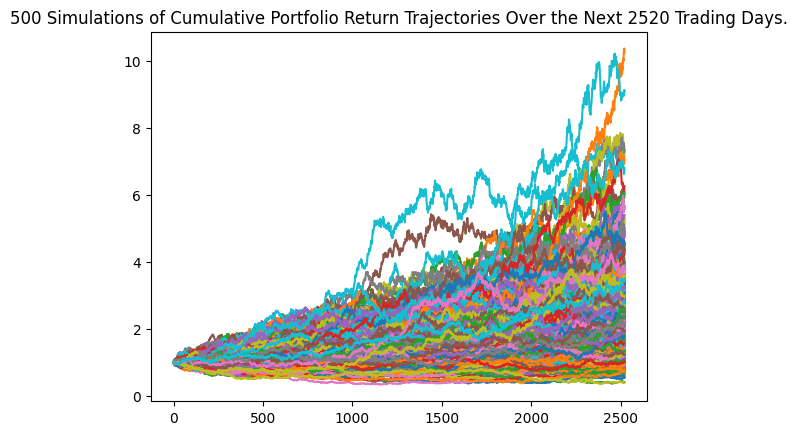

In [71]:
# Plot simulation outcomes
mc_ten_years.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

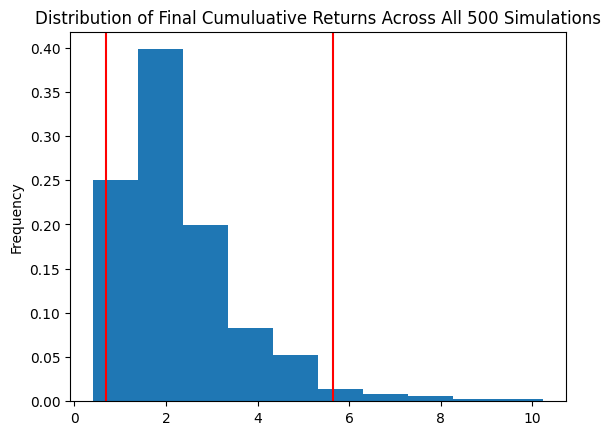

In [72]:
# Plot probability distribution and confidence intervals
mc_ten_years.plot_distribution()

In [73]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl10=mc_ten_years.summarize_cumulative_return()

# Print summary statistics
print(tbl10)

count           500.000000
mean              2.300027
std               1.340471
min               0.397077
25%               1.397836
50%               1.973691
75%               2.826570
max              10.241805
95% CI Lower      0.695646
95% CI Upper      5.648501
Name: 2520, dtype: float64


In [74]:
# Set initial investment
initial_investment=20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten=round(tbl[8]*initial_investment,2)
ci_upper_ten=round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $19183.63 and $338634.15


## I concluded that 5 or 10 year riskier stock retirement attempt (20/80 bonds/stocks) did not hit the high return level of investement for 30 years less riskier investement (40/60 bond/stock)